# Homework 3
## Due Date:  Thursday, October 4th at 11:59 PM
### There are 3 parts to this homework.
   [Problem 1](#p1) Writing a Linear regression class using Object Oriented Programming (OOP) paradigm [40pts]<br>
   [Problem 2](#p2) Toy module [10pts] <br>
   [Problem 3](#p3) Writing Bank Account software using Object Oriented Programming (OOP) paradigm [50pts]
    
---

<a id='p1'></a>
## Problem 1:  Linear Regression Class [40pts]

In this problem, you will create custom `Python` classes for two related types of linear regression: Ordinary Least Squares Linear Regression and Ridge Regression.

You are prohibited from using standard regression libraries in `Python` such as `sklearn`.  These classes must be your own.  However, you *are* permitted to check your answers against standard libraries.

### Background

Consider the multivariate linear model:
$$y = X\beta + \epsilon$$
where $y$ is a length $n$ vector, $X$ is an $m \times p$ matrix, and $\beta$ is a $p$ length vector of coefficients.

The goal is to find the coefficients $\beta$ so that the linear model fits the data the best.  There are many approaches to this, but in this problem you will only consider two.

#### Ordinary Least Squares Linear Regression

[OLS Regression](https://en.wikipedia.org/wiki/Ordinary_least_squares) seeks to minimize the following cost function:

$$\|y - \beta X\|^{2}.$$

The best fit coefficients are given by:

$$\widehat{\beta} = (X^T X)^{-1}X^Ty$$

where $X^T$ is the transpose of the matrix $X$ and $X^{-1}$ is the inverse of the matrix $X$.

#### Ridge Regression

[Ridge Regression](https://en.wikipedia.org/wiki/Tikhonov_regularization) introduces an $L_{2}$ regularization so the new cost function is:

$$\|y - \beta X\|^{2}+\|\Gamma \beta \|^{2}.$$

where $\Gamma = \alpha I$ for some constant $\alpha$ and $I$ is the identity matrix.

The best fit coefficients for this case are given by:
$$\hat{\beta} = (X^T X+\Gamma^T\Gamma)^{-1}X^Ty.$$

#### $R^2$ score
You will use the [$R^{2}$ metric](https://en.wikipedia.org/wiki/Coefficient_of_determination) to assess the performance of the models.  The $R^2$ score is defined as:
$$\displaystyle R^{2} = 1-\dfrac{SS_{E}}{SS_{T}}$$
where
$$SS_{T}=\sum_{i}{\left(y_{i}-\overline{y}\right)^2}$$ and $$SS_{E}=\sum_{i}{\left(y_{i} - \widehat{y_i}\right)^2}.$$

The ${y_i}$ are the original data values, $\widehat{y_i}$ are the predicted values, and $\overline{y_i}$ is the mean of the original data values.

### Part 1:  Base Class
Write a class called `Regression` with the following methods:

`__init__()`: Initializez an empty dictionary called `params`.

`fit(X, y)`: Fits linear model to $X$ and $y$.  Stores best-fit parameters in the dictionary attribute called `params`.  The first key should be the coefficients (not including the intercept) and the second key should be the intercept.

`get_params()`: Returns $\widehat{\beta}$ for the fitted model.  Note that the `fit` method already stored the dictionary in `params`, so all you need to do is return that dictionary.

`predict(X)`: Predict new values with the fitted model given $X$.

`score(X, y)`: Returns the $R^2$ value of the fitted model.

`set_params()`: Manually set parameters of the linear model.  The method should accept variable keyword arguments (`**kwargs`) containing model parameters.  In this problem, it will be used to set the reguarization coefficient $\alpha$ in the ridge regression model.

This parent class should throw a `NotImplementedError` for methods that are intended to be implemented by subclasses.

Here is the interface for the `Regression` class:

In [ ]:
class Regression(object):
    
    def __init__(self):
        # your code
    
    def get_params(self):
        # your code
    
    def set_params(self, **kwargs):
        # your code
        
    def fit(self, X, y):
        # your code
        
    def predict(self, X):
        # your code
        
    def score(self, X, y):
        # your code

### Part 2: OLS Linear Regression

Write a class called `LinearRegression` that implements the OLS Regression model described above and inherits the `Regression` class.

**Hints:**
* Note that the linear model $\beta X$ can also include an intercept term (e.g. $\displaystyle \beta_{1} x_{1} + \beta_{0}$).  This is handled by appending a column of ones to the feature matrix $X$.  See the [`numpy.append`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.append.html) documentation.  You may want to consider doing the append inside your `fit` method.
* The best-fit coefficients $\widehat{\beta}$ are determined by forming the inverse of $\displaystyle X^{T}X$.  Rather than using the `numpy.linalg.inv` method, it would be better to use the [pseudo-inverse](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [190]:
import numpy as np
from numpy.linalg import pinv
class Regression(object):
    
    def __init__(self):
        # your code
        self.params = {}
    
    def get_params(self):
        # your code
        return self.params
    
    def set_params(self, **kwargs):
        # your code
        for key, value in kwargs.items():
            self.params[key] = value
        
    def fit(self, X, y):
        # your code
        X0 = np.ones((X.shape[0],1))
        X = np.hstack((X,X0))
        betas = np.dot(np.dot(pinv(np.dot(X.T, X)), X.T), y)
        self.params['coefficients'] = betas[:-1]
        self.params['intercept'] = betas[-1]
        
    def predict(self, X):
        # your code
        X0 = np.ones((X.shape[0],1))
        X = np.hstack((X,X0))
        betas = np.append(self.params['coefficients'], self.params['intercept'])
        y_pred = np.dot(X, betas)
        return y_pred
        
    def score(self, X, y):
        # your code
        y_pred = self.predict(X)
        y_mean = np.mean(y)
        SSt = np.sum((y - y_mean)**2)
        SSe = np.sum((y - y_pred)**2)
        r2 = 1 - SSe/SSt
        return r2

### Part 3: Ridge Regression

Write a class called `RidgeRegression` that implements Ridge Regression and inherits the `LinearRegression` class.

In [191]:
class RidgeRegression(Regression):
    def __init__(self, alpha):
        # your code
        self.params = {}
        self.params['alpha'] = alpha
    def fit(self, X, y):
        # your code
        I = np.identity(X.shape[1]+1)
        pnt = self.params['alpha']*I
        X0 = np.ones((X.shape[0],1))
        X = np.hstack((X,X0))
        betas = np.dot(np.dot(pinv(np.dot(X.T, X) + np.dot(pnt.T, pnt)), X.T), y)
        self.params['coefficients'] = betas[:-1]
        self.params['intercept'] = betas[-1]

### Part 4: Model Scoring
You will use the [Boston dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html) for this part.

Instantiate each of the two models above.  Using a for loop, fit (on the training data) and score (on the testing data) each model on the Boston dataset.

**Note 1:** Some of you may not be familiar with the train-test split pattern from the statistics world.  All this means is that you take your dataset and split it into two parts, a training part and test part (often 80-20 split).  You perform the analysis on the training data in order to determine the best-fit parameters in your model.  Then, you use that model to make a prediction using data from the test set.  Finally, you assess the performance of the model on the test set.

Print out the $R^2$ value for each model and the parameters for the best model using the `get_params()` method.  Use an $\alpha$ value of 0.1.

**Hint:**  The code below demonstrates how to do a train-test split.  It also demos the way a user should interact with your classes.  Note that the demo uses the diabetes dataset, which you should change to the Boston dataset. 

In [171]:
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)

In [172]:
X.shape

(506, 13)

In [173]:
y.shape

(506,)

In [175]:
import numpy as np
from sklearn import datasets
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

alpha = 0.1
models = [Regression(),
          RidgeRegression(alpha)]

for model in models:
    model.fit(X_train, y_train)
    print(model.score(X_test, y_test))

0.6684825753971775
0.6678550672649828


### Part 5: Visualize Model Performance

Evaluate how the models perform for various values of $\alpha$.
* Calculate the $R^2$ scores for each model 
* Use $\alpha \in [0.05, 1]$ for the Ridge regression model
* Plot the two lines on the same graph.
* To change the parameters, use the `set_params()` method that you wrote.

**Be sure to create a readable and interpretable plot!**.  This means axes labels should be present and readable and the plot should have a legend.

In [180]:
for model in models:
    model.fit(X_train, y_train)
    print('R^2 is:', model.score(X_test, y_test))

R^2 is: 0.6684825753971775
R^2 is: 0.6678550672649828


$R^2$ of Linear Regression is 0.66848, $R^2$ of Ridge Regression is 0.66786.

In [196]:
alphas = np.linspace(0.05, 1, 50)
r1_list = []
r2_list = []
for alpha in alphas:
    model1 = Regression()
    model2 = RidgeRegression(alpha)
    model1.fit(X_train, y_train)
    r1_list.append(model1.score(X_test, y_test))
    model2 = RidgeRegression(alpha)
    model2.set_params({'alpha':alpha})
    model2.fit(X_train, y_train)
    r2_list.append(model2.score(X_test, y_test))

Text(0,0.5,'R^2 score')

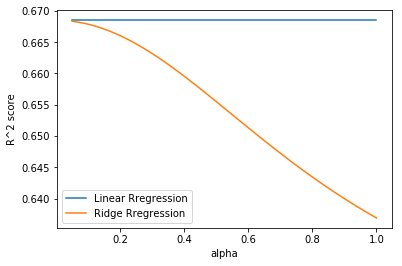

In [200]:
plt.plot(np.linspace(0.05, 1, 50), r1_list, label = 'Linear Rregression')
plt.plot(np.linspace(0.05, 1, 50), r2_list, label = 'Ridge Rregression')
plt.legend()
plt.xlabel('alpha')
plt.ylabel('R^2 score')

<a id='p2'></a>
# Problem 2 [10pts]
We discussed how to create `Python` modules in lecture.  In this problem, you will create an very basic module and demonstrate some basic functionality.  The purpose of this exercise is to get you familiar with the essence of modules.

### Module
So far, we have only been writing short `Python` scripts. However, when your code base starts to get bigger, you might want to organize your function and class definitions. The idea behind modules is to split your function and class definitions into multiple, logical units.  When you want to use a function or class you simply import it from the module.  In essence, a module is a file containing `Python` definitions and statements.

### Part 1:  Create a module
Create a file called `MathCS207.py` inside your HW3 directory and include the following functions and names.  Please fill out the definition body.  `MathCS207.py` is now a module.

In [24]:
def add(a,b):
    # your code here
    return a + b
    
def subtract(a,b):
    # your code here
    return a - b
    
def multiply(a,b):
    # your code here
    return a*b

def divide(a,b):
    # your code here
    if b == 0:
        return print("denominator cannot be 0")
    return a/b


### Part 2:  Import a whole module and use it
Import the whole module you just created above and use the module's functions to perform addition, subtration, multiplication and division of the following numbers: 

<br><br>
$$a = 10$$
$$b = 2$$


In [26]:
# your code here
from MathCS207 import *
a = 10
b = 2
print(add(a, b))
print(subtract(a, b))
print(multiply(a, b))
print(divide(a, b))

12
8
20
5.0


### Part 3:  Import a single function from a module and use it
Import the "add" from the `MathCS207` module and use it to add the following numbers:

<br><br>
$$a = 10$$
$$b = 2$$

In [27]:
# your code here
from MathCS207 import add
a = 10
b = 2
print(add(a, b))

12


### Part 4:  Import a module by creating an alias of it and then use the alias
Import the `MathCS207` module as `mathcs` and use it to add the following numbers:

<br><br>
$$a = 10$$
$$b = 2$$

In [28]:
# your code here
import MathCS207 as mathcs
mathcs.add(a, b)

12

### Part 5:  List every function definition inside the module `MathCS207`
Import the `MathCS207` module and list every function that can be accessed through this module by using a `Python` built-in function.

In [92]:
# your code here
import MathCS207
dir(MathCS207)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'add',
 'divide',
 'multiply',
 'subtract']

---
<a id='p3'></a>
# Problem 3: Bank Account Revisited [50pts]

We are going to redo the bank account closure problem from homework 2, only this time developing a formal class for a Bank User and Bank Account to use in our closure (recall previously we just had a nonlocal variable amount that we changed).

### IMPORTANT
We will be grading this problem with a test suite. Put the `enum`, classes, and closure in a single file named `Bank.py`. It is very important that the class and method specifications we provide in the problem description are used (with the same capitalization), otherwise you will receive no credit.

### Some Preliminaries:
First define two types of bank accounts.  Use the code below to do this:

In [29]:
from enum import Enum
class AccountType(Enum):
    SAVINGS = 1
    CHECKING = 2

Now, just to orient you, let's expore this class a little bit.

In [30]:
AccountType.SAVINGS

<AccountType.SAVINGS: 1>

returns a `Python` representation of an enumeration.

You can compare these account types:

In [31]:
AccountType.SAVINGS == AccountType.SAVINGS

True

In [32]:
AccountType.SAVINGS == AccountType.CHECKING

False

Note that to get a string representation of an `Enum`, you can use:

In [33]:
AccountType.SAVINGS.name

'SAVINGS'

In [100]:
AccountType(1).name

'SAVINGS'

### Part 1: Create a BankAccount class with the following specification:

Constructor is `BankAccount(self, owner, accountType)` where `owner` is a string representing the name of the account owner and `accountType` is one of the AccountType `enums`

Methods `withdraw(self, amount)` and `deposit(self, amount)` to modify the account balance of the account.

Override methods `__str__` to write an informative string of the account owner and the type of account, and `__len__` to return the balance of the account

In [ ]:
class BankAccount(object):
    def __init__(self, owner, accountType):
        self.owner = owner
        self.accountType = AccountType(accountType)
        self.balance = 0
    
    def withdraw(self, amount):
        try:
            assert self.balance >= amount and amount > 0
            self.balance = self.balance - amount
        except AssertionError:
            print("Withdraw amount must be smaller than the current balance")
            
    def deposit(self, amount):
        self.balance = self.balance + amount
        
    def __str__(self):
        return 'Owner: ' + self.owner + ', AccountType: ' + self.accountType.name
        
    def __len__(self):
        return self.balance

### Part 2:  Write a class BankUser with the following specification:

Constructor `BankUser(self, owner)` where `owner` is the name of the account.

Method `addAccount(self, accountType)` - to start, a user will have no accounts when the BankUser object is created. `addAccount` will add a new account to the user of the `accountType` specified. **Only one savings/checking account per user, return appropriate error otherwise.**

Methods `getBalance(self, accountType)`, `deposit(self, accountType, amount)`, and `withdraw(self, accountType, amount)` for a specific `AccountType`.

Override `__str__` to have an informative summary of user's accounts.

In [165]:
class BankUser:
    def __init__(self, owner):
        self.owner = owner
        self.saving = False
        self.checking = False
        self.saving_balance = None
        self.checking_balance = None
    
    def addAccount(self, accountType):
        if not self.saving or not self.checking:
            if accountType == AccountType.SAVINGS and not self.saving:
                self.saving = True
                self.saving_balance = 0
            elif accountType == AccountType.CHECKING and not self.checking:
                self.checking = True
                self.checking_balance = 0
            else:
                print('Only one savings/checking account per user.')
        else:
            print('Only one savings/checking account per user.')
            
    def getBalance(self, accountType):
        if accountType == AccountType.SAVINGS and self.saving:
            print('Current Balance:', self.saving_balance)
        elif accountType == AccountType.CHECKING and self.checking:
            print('Current Balance:', self.checking_balance)
        else:
            print('Do not have this type of account.')
    
    def deposit(self, accountType, amount):
        if accountType == AccountType.SAVINGS:
            if self.saving:
                if isinstance(amount, int):
                    self.saving_balance = self.saving_balance + amount
                    print('Current Balance:', self.saving_balance)
                else:
                    print("Deposit amount is illegal")
            else:
                print('Do not have this type of account.')
        elif accountType == AccountType.CHECKING:
            if self.checking:
                if isinstance(amount, int):
                    self.checking_balance = self.checking_balance + amount
                    print('Current Balance:', self.checking_balance)
                else:
                    print("Deposit amount is illegal")
            else:
                print('Do not have this type of account.')
        else:
            print('Do not have this type of account.')
    
    def withdraw(self, accountType, amount):
        try:
            if accountType == AccountType.SAVINGS and self.saving:
                assert self.saving_balance >= amount and amount > 0 and isinstance(amount, int)
                self.saving_balance = self.saving_balance - amount
                print('Current Balance:', self.saving_balance)
            elif accountType == AccountType.CHECKING and self.checking:
                assert self.checking_balance >= amount and amount > 0 and isinstance(amount, int)
                self.checking_balance = self.checking_balance - amount
                print('Current Balance:', self.checking_balance)
            else:
                print('Do not have this type of account.')
        except AssertionError:
            print("Withdraw amount is illegal")

Write some simple tests to make sure this is working. Think of edge scenarios a user might try to do.

In [142]:
user = BankUser('Zheng')
user.addAccount(AccountType.SAVINGS)

In [143]:
user.addAccount(AccountType.CHECKING)

In [144]:
user.addAccount(AccountType.SAVINGS)

Only one savings/checking account per user.


In [145]:
user.deposit(AccountType.SAVINGS, 200)

Current Balance: 200


In [146]:
user.withdraw(AccountType.SAVINGS, 300)

Withdraw amount is illegal


In [147]:
user.withdraw(AccountType.SAVINGS, -100)

Withdraw amount is illegal


In [148]:
user.withdraw(AccountType.SAVINGS, 100)

Current Balance: 100


In [149]:
user.deposit(AccountType.SAVINGS, 200)

Current Balance: 300


In [150]:
user.getBalance(AccountType.SAVINGS)

Current Balance: 300


In [151]:
user.getBalance(AccountType.CHECKING)

Current Balance: 0


### Part 3:  ATM Closure

Finally, we are going to rewrite a closure to use our bank account. We will make use of the [input function](http://anh.cs.luc.edu/python/hands-on/3.1/handsonHtml/io.html) which takes user input to decide what actions to take.

Write a closure called `ATMSession(bankUser)` which takes in a `BankUser` object. It should return a method called `Interface` that, when called, would provide the following interface:

First screen for user will look like:


**Enter Option:**

**1)Exit**

**2)Create Account**

**3)Check Balance**

**4)Deposit**

**5)Withdraw**


Pressing 1 will exit, any other option will show the options:



**Enter Option:**

**1)Checking**

**2)Savings**


If a deposit or withdraw was chosen, then there must be a third screen:



**Enter Integer Amount, Cannot Be Negative:**

This is to keep the code relatively simple, if you'd like you can also curate the options depending on the `BankUser` object (for example, if the user has no accounts then only show the Create Account option), but this is up to you. In any case, you must handle any input from the user in a reasonable way that an actual bank would be okay with, and give the user a proper response to the action specified.

Upon finishing a transaction or viewing balance, it should go back to the original screen.

In [166]:
def ATMSession(bankUser):
    def Interface():
        choise = int(input('Enter Option:\n' + '1)Exit\n' + '2)Create Account\n' + '3)Check Balance\n' + '4)Deposit\n' + '5)Withdraw\n'))
        while choise != 1:
            if choise < 1 or choise > 5:
                print('Please enter an available option.')
            else:
                print('Enter Option:')
                print('1)Checking')
                print('2)Savings')
                accType = int(input())
                while accType not in [1, 2]:
                    accType = int(input('Please input 1 for checking or 2 for savings.'))
                if choise == 2:
                    if accType == 1:
                        bankUser.addAccount(AccountType.CHECKING)
                    else:
                        bankUser.addAccount(AccountType.SAVINGS)

                elif choise == 3:
                    if accType == 1:
                        bankUser.getBalance(AccountType.CHECKING)
                    else:
                        bankUser.getBalance(AccountType.SAVINGS)

                elif choise == 4:
                #check whether has the certain account
                    if accType == 1:
                        if bankUser.checking:
                            amount = input('Enter Integer Amount, Cannot Be Negative:')
                            try:
                                amount = int(amount)
                            except ValueError:
                                amount = float(amount)
                            while amount < 0 or not isinstance(amount, int):
                                amount = input('Enter Integer Amount, Cannot Be Negative:')
                                try:
                                    amount = int(amount)
                                except ValueError:
                                    amount = float(amount)
                            bankUser.deposit(AccountType.CHECKING, amount)
                        else:
                            print('Do not have this type of account.')
                            
                    else:
                        if bankUser.saving:
                            amount = input('Enter Integer Amount, Cannot Be Negative:')
                            try:
                                amount = int(amount)
                            except ValueError:
                                amount = float(amount)
                            while amount < 0 or not isinstance(amount, int):
                                amount = input('Enter Integer Amount, Cannot Be Negative:')
                                try:
                                    amount = int(amount)
                                except ValueError:
                                    amount = float(amount)
                            bankUser.deposit(AccountType.SAVINGS, amount)
                        else:
                            print('Do not have this type of account.')
                            
                else:
                    if accType == 1:
                        if bankUser.checking:
                            amount = input('Enter Integer Amount, Cannot Be Negative:')
                            try:
                                amount = int(amount)
                            except ValueError:
                                amount = float(amount)
                            while amount < 0 or not isinstance(amount, int):
                                amount = input('Enter Integer Amount, Cannot Be Negative:')
                                try:
                                    amount = int(amount)
                                except ValueError:
                                    amount = float(amount)
                            bankUser.withdraw(AccountType.CHECKING, amount)
                        else:
                            print('Do not have this type of account.')
                    else:
                        if bankUser.saving:
                            amount = input('Enter Integer Amount, Cannot Be Negative:')
                            try:
                                amount = int(amount)
                            except ValueError:
                                amount = float(amount)
                            while amount < 0 or not isinstance(amount, int):
                                amount = input('Enter Integer Amount, Cannot Be Negative:')
                                try:
                                    amount = int(amount)
                                except ValueError:
                                    amount = float(amount)
                            bankUser.withdraw(AccountType.SAVINGS, amount)
                        else:
                            print('Do not have this type of account.') 
                            
            choise = int(input('Enter Option:\n' + '1)Exit\n' + '2)Create Account\n' + '3)Check Balance\n' + '4)Deposit\n' + '5)Withdraw\n'))
    return Interface

In [167]:
user = ATMSession(BankUser('Zheng Yang'))
user()

Enter Option:
1)Exit
2)Create Account
3)Check Balance
4)Deposit
5)Withdraw
2
Enter Option:
1)Checking
2)Savings
1
Enter Option:
1)Exit
2)Create Account
3)Check Balance
4)Deposit
5)Withdraw
3
Enter Option:
1)Checking
2)Savings
1
Current Balance: 0
Enter Option:
1)Exit
2)Create Account
3)Check Balance
4)Deposit
5)Withdraw
3
Enter Option:
1)Checking
2)Savings
2
Do not have this type of account.
Enter Option:
1)Exit
2)Create Account
3)Check Balance
4)Deposit
5)Withdraw
4
Enter Option:
1)Checking
2)Savings
1
Enter Integer Amount, Cannot Be Negative:100.0
Enter Integer Amount, Cannot Be Negative:-100
Enter Integer Amount, Cannot Be Negative:100
Current Balance: 100
Enter Option:
1)Exit
2)Create Account
3)Check Balance
4)Deposit
5)Withdraw
3
Enter Option:
1)Checking
2)Savings
1
Current Balance: 100
Enter Option:
1)Exit
2)Create Account
3)Check Balance
4)Deposit
5)Withdraw
4
Enter Option:
1)Checking
2)Savings
2
Do not have this type of account.
Enter Option:
1)Exit
2)Create Account
3)Check Bal

### Part 4:  Put everything in a module Bank.py

We will be grading this problem with a test suite. Put the enum, classes, and closure in a single file named Bank.py. It is very important that the class and method specifications we provided are used (with the same capitalization), otherwise you will receive no credit.

---